In [4]:
!mkdir -p /root/.cache/torch/hub/checkpoints/
!cp ../input/computer-vision-for-the-humanities-ph/resnet18-5c106cde.pth /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth

mkdir: /root: Read-only file system
cp: ../input/computer-vision-for-the-humanities-ph/resnet18-5c106cde.pth: No such file or directory


In [5]:
from fastai.vision.all import *
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn')

/var/folders/63/xw1tjdvn7dx4ydllj6wms12r0000gn/T/ipykernel_44791/370769146.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [6]:
ad_data = ImageDataLoaders.from_csv(
    path="./ads_data/ads_data/",  # root path to csv file and image directory
    csv_fname="ads_upsampled.csv",  # the name of our csv file
    folder="images/",  # the folder where our images are stored
    fn_col="file",  # the file column in our csv
    label_col="label",  # the label column in our csv
    item_tfms=Resize(224, ResizeMethod.Squish),  # resize imagesby squishing so they are 224x224 pixels
    seed=42,  # set a fixed seed to make results more reproducible
)

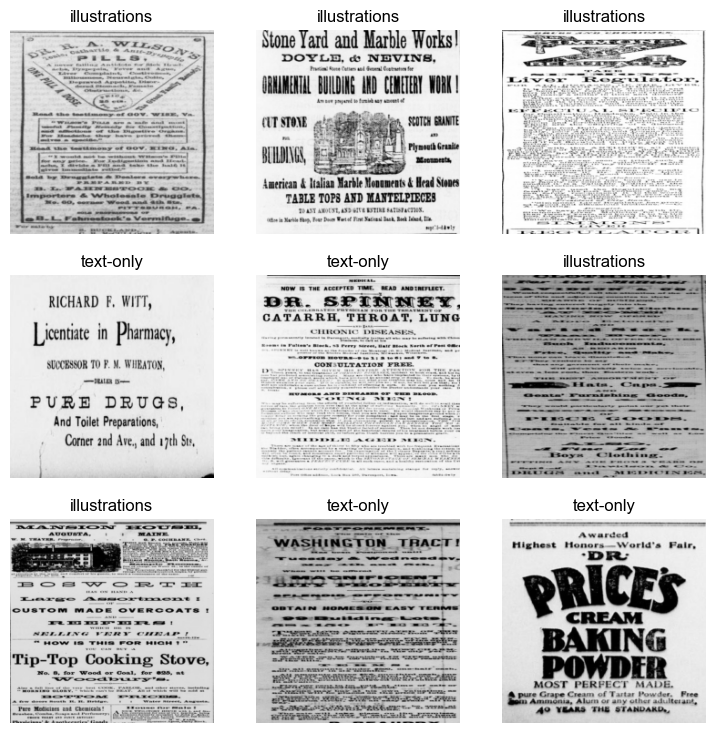

In [4]:
ad_data.show_batch()

In [7]:
learn = vision_learner(
    ad_data, # the data the model will be trained on
    resnet18, # the type of model we want to use
    metrics=accuracy, # the metrics to track 
)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/ashleyjeon/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:06<00:00, 7.47MB/s]


In [8]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.018629,0.374119,0.866667,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.363616,0.565232,0.806667,00:26
1,0.242517,0.486649,0.833333,00:20
2,0.162109,0.226357,0.900000,00:44
3,0.114355,0.123636,0.946667,00:39
4,0.085911,0.084464,0.973333,00:39
